## Nutrition needs calculation

In [9]:
def get_activity_factor(activity_level):
    activity_factors = {
        1: 1.2,    # Sedentary
        2: 1.375,  # Lightly active 
        3: 1.55,   # Moderately active
        4: 1.725,  # Very active
        5: 1.9     # Extra active
    }
    if activity_level not in activity_factors:
        raise ValueError("Invalid activity level. Choose number 1 to 5")
    return activity_factors[activity_level]

def get_stress_factor(stress_level):
    stress_factors = {
        1: 1.05,   # Average of 1.0 to 1.1
        2: 1.3,    # Average of 1.2 to 1.4
        3: 1.45,   # Average of 1.4 to 1.5
        4: 1.55,   # Average of 1.5 to 1.6
        5: 1.7     # Fixed at 1.7
    }
    if stress_level not in stress_factors:
        raise ValueError("Invalid stress level. Choose number 1 to 5")
    return stress_factors[stress_level]

def calculate_tef(bmr):
    return bmr * 0.1

def calculate_AdjBW(ibw, abw):
    return ibw + 0.5 * (abw - ibw)

def calculate_ibw(height_cm):
    return (height_cm - 100) - (height_cm - 100) * 0.1

def calculate_bmr(weight_kg, height_cm, age_years):
    adjbw = calculate_AdjBW(calculate_ibw(height_cm), weight_kg)
    bmr = 655.1 + (9.563 * adjbw) + (1.85 * height_cm) - (4.676 * age_years)
    return bmr

def calculate_tee(bmr, activity_level, stress_level):
    activity_factor = get_activity_factor(activity_level)
    stress_factor = get_stress_factor(stress_level)
    tef = calculate_tef(bmr)
    pa = bmr * activity_factor
    stress = bmr * stress_factor
    return bmr + tef + pa - stress

def calculate_macros(tee):
    protein_grams = (tee * 0.15) / 4 # 1 gram of protein = 4 calories
    carb_grams = (tee * 0.60) / 4   # 1 gram of carbs = 4 calories
    fat_grams = (tee * 0.25) / 9    # 1 gram of fat = 9 calories
    return protein_grams, carb_grams, fat_grams

def calculate_all_needs(weight_kg, height_cm, age_years, activity_level, stress_level):
    bmr = calculate_bmr(weight_kg, height_cm, age_years)
    tee = calculate_tee(bmr, activity_level, stress_level)
    protein_grams, carb_grams, fat_grams = calculate_macros(tee)
    return tee, protein_grams, carb_grams, fat_grams

## Datasets

In [10]:
import os
import random
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# URLs for datasets
url_mp = 'https://github.com/NathanDaud123/Puma/blob/main/Dataset/MP.csv?raw=true'
url_sn = 'https://github.com/NathanDaud123/Puma/blob/main/Dataset/SN.csv?raw=true'
url_sh = 'https://github.com/NathanDaud123/Puma/blob/main/Dataset/SH.csv?raw=true'
url_sy = 'https://github.com/NathanDaud123/Puma/blob/main/Dataset/SY.csv?raw=true'
url_plk = 'https://github.com/NathanDaud123/Puma/blob/main/Dataset/PLK.csv?raw=true'

# Load datasets
mp = pd.read_csv(url_mp)
sn = pd.read_csv(url_sn)
sh = pd.read_csv(url_sh)
sy = pd.read_csv(url_sy)
plk = pd.read_csv(url_plk)

## Cost function

In [17]:
def normalize(value, min_old, max_old, min_new, max_new):
    return round(1 + ((value - min_old) / (max_old - min_old)) * (max_new - min_new))

def hitung_total_karbo(individual):
    total_karbo = 0
    for i in range(0, 15, 5):
        total_karbo += mp['carbo'][round(individual[i])-1] + sn['carbo'][round(individual[i+1])-1] + sh['carbo'][round(individual[i+2])-1] + sy['carbo'][round(individual[i+3])-1] + plk['carbo'][round(individual[i+4])-1]
    return total_karbo

def hitung_total_protein(individual):
    total_protein = 0
    for i in range(0, 15, 5):
        total_protein += mp['protein'][round(individual[i])-1] + sn['protein'][round(individual[i+1])-1] + sh['protein'][round(individual[i+2])-1] + sy['protein'][round(individual[i+3])-1] + plk['protein'][round(individual[i+4])-1]
    return total_protein

def hitung_total_energy(individual):
    total_energy = 0
    for i in range(0, 15, 5):
        total_energy += mp['energy'][round(individual[i])-1] + sn['energy'][round(individual[i+1])-1] + sh['energy'][round(individual[i+2])-1] + sy['energy'][round(individual[i+3])-1] + plk['energy'][round(individual[i+4])-1]
    return total_energy

def hitung_total_lemak(individual):
    total_fat = 0
    for i in range(0, 15, 5):
        total_fat += mp['fat'][round(individual[i])-1] + sn['fat'][round(individual[i+1])-1] + sh['fat'][round(individual[i+2])-1] + sy['fat'][round(individual[i+3])-1] + plk['fat'][round(individual[i+4])-1]
    return total_fat

def fitness_func(individual):
    total_karbo = hitung_total_karbo(individual)
    total_energi = hitung_total_energy(individual)
    total_protein = hitung_total_protein(individual)
    total_lemak = hitung_total_lemak(individual)

    penalty_karbo = abs(kebutuhan_karbo - total_karbo)
    penalty_energi = abs(kebutuhan_energi - total_energi)
    penalty_protein = abs(kebutuhan_protein - total_protein)
    penalty_lemak = abs(kebutuhan_lemak - total_lemak)

    total_penalty = penalty_karbo + penalty_energi + penalty_protein + penalty_lemak
    return 1000 / (total_penalty + 1)  # Avoid division by zero

def calculate_all_needs(weight_kg, height_cm, age_years, activity_level, stress_level):
    bmr = calculate_bmr(weight_kg, height_cm, age_years)
    tee = calculate_tee(bmr, activity_level, stress_level)
    protein_grams, carb_grams, fat_grams = calculate_macros(tee)
    return tee, carb_grams, protein_grams, fat_grams

# Example usage
weight_kg = 60
height_cm = 160
age_years = 25
activity_level = 2
stress_level = 1

global kebutuhan_energi, kebutuhan_karbo, kebutuhan_protein, kebutuhan_lemak 
kebutuhan_energi, kebutuhan_karbo, kebutuhan_protein, kebutuhan_lemak = calculate_all_needs(weight_kg, height_cm, age_years, activity_level, stress_level)

## Visualization of menu

In [12]:
def menues(best):
    print("Makan Pagi")
    print(f'Makanan pokok\t = {mp["menu"][best[0]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best[1]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best[2]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best[3]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best[4]-1]}')
    print("Makan Siang")
    print(f'Makanan pokok\t = {mp["menu"][best[5]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best[6]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best[7]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best[8]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best[9]-1]}')
    print("Makan Malam")
    print(f'Makanan pokok\t = {mp["menu"][best[10]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best[11]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best[12]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best[13]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best[14]-1]}')

## Genetics Algorithm

In [19]:
import random

def selection(populasi):
    """
    Select the two best individuals (parents) from the population based on their fitness scores.

    Parameters:
    populasi (dict): A dictionary representing the population. Each key corresponds to an individual,
                     and each value is a dictionary with 'gen' (list of genes) and 'fitness' (fitness score).

    Returns:
    tuple: Two dictionaries representing the selected parents, each containing 'gen' and 'fitness'.
    """
    result1 = dict()
    result2 = dict()
    arryGen = []
    arryFitness = []

    # Extract fitness values and genes from the population
    for i in populasi:
        arryFitness.append(float(populasi[i]['fitness']))
        arryGen.append(populasi[i]['gen'])

    # Select the first parent with the highest fitness
    indexparent1 = arryFitness.index(max(arryFitness))
    result1['gen'] = arryGen[indexparent1]
    result1['fitness'] = arryFitness[indexparent1]

    # Set the fitness of the first parent to 0.0 to exclude it from the second selection
    arryFitness[indexparent1] = 0.0

    # Select the second parent with the next highest fitness
    indexparent2 = arryFitness.index(max(arryFitness))
    result2['gen'] = arryGen[indexparent2]
    result2['fitness'] = arryFitness[indexparent2]

    return result1, result2

def crossOver(parent1, parent2, point, cr):
    """
    Perform crossover between two parents to generate two offspring.

    Parameters:
    parent1 (list): The first parent's genes (list of values).
    parent2 (list): The second parent's genes (list of values).
    point (int): The crossover point (index) where genes will be swapped between parents.
    cr (float): The crossover rate (probability of crossover occurring).

    Returns:
    tuple: Two lists representing the genes of the offspring after crossover.
    """
    p1, p2 = list(parent1), list(parent2)

    # Perform crossover based on the crossover rate
    if random.random() < cr:
        for i in range(point, len(p1)):
            p1[i], p2[i] = p2[i], p1[i]

    return p1, p2

def insertion_mutation(individual, mutation_rate):
    """
    Perform insertion mutation on an individual.

    Parameters:
    individual (list): The individual's genes (list of values).
    mutation_rate (float): The mutation rate (probability of mutation occurring).

    Returns:
    list: The mutated individual (list of genes).
    """
    if random.random() < mutation_rate:
        point1 = random.randint(0, len(individual) - 1)
        point2 = random.randint(0, len(individual) - 1)
        individual.insert(point1, individual.pop(point2))  # Swap genes at random positions

    return individual

def createPopulation(target, besarPopulasi):
    """
    Create an initial population for the genetic algorithm.

    Parameters:
    target (int): The number of genes in each individual.
    besarPopulasi (int): The size of the population (number of individuals).

    Returns:
    dict: A dictionary representing the population, with each individual containing 'gen' and 'fitness'.
    """
    populasi = dict()

    for i in range(besarPopulasi):
        temp = dict()
        gen = [random.randint(1, 100) for _ in range(target)]  # Generate random genes
        temp['gen'] = [normalize(gene, 1, 100, 1, 11) for gene in gen]  # Normalize the genes
        temp['fitness'] = fitness_func(temp['gen'])  # Calculate fitness
        populasi[str(i + 1)] = temp

    return populasi

def regeneration(children, oldPopulasi):
    """
    Create a new population by replacing the weakest individuals with the offspring.

    Parameters:
    children (list): A list of dictionaries representing the offspring.
    oldPopulasi (dict): The current population.

    Returns:
    dict: The new population after regeneration.
    """
    newPopulasi = dict()
    templist = []

    # Extract and sort the old population by fitness (ascending order)
    for i in range(len(oldPopulasi)):
        temp = []
        temp.append(oldPopulasi[str(i + 1)]['gen'])
        temp.append(oldPopulasi[str(i + 1)]['fitness'])
        templist.append(temp)

    templist.sort(key=lambda x: x[1])

    # Retain the weakest individuals in the new population
    for j in range(len(templist)):
        tempd = dict()
        tempd['gen'] = templist[j][0]
        tempd['fitness'] = templist[j][1]
        newPopulasi[str(j + 1)] = tempd

    # Replace the weakest individuals with the offspring
    for k in range(len(children)):
        newPopulasi[str(k + 1)] = children[k]

    return newPopulasi

def termination(populasi, generasi):
    """
    Determine if the genetic algorithm should terminate.

    Parameters:
    populasi (dict): The current population.
    generasi (int): The current generation number.

    Returns:
    tuple: The best individual's genes and fitness score in the population.
    """
    best, _ = selection(populasi)
    return best['gen'], best['fitness']

## Hyperparameter Tuning

### Population size tuning

Parameter ke- -> 1
1 -> {'1': {'gen': [7, 4, 6, 9, 4, 10, 7, 11, 5, 2, 8, 5, 4, 10, 8], 'fitness': 0.6639206574010945}, '2': {'gen': [2, 3, 5, 2, 5, 5, 4, 3, 2, 5, 9, 9, 6, 9, 2], 'fitness': 0.7411502534198269}, '3': {'gen': [2, 10, 9, 5, 10, 9, 7, 1, 4, 5, 4, 7, 10, 2, 4], 'fitness': 0.8645403020264787}, '4': {'gen': [7, 4, 10, 8, 7, 3, 4, 9, 4, 8, 8, 3, 6, 10, 9], 'fitness': 1.0717377576044846}, '5': {'gen': [10, 3, 9, 8, 7, 6, 8, 8, 10, 3, 7, 8, 8, 5, 2], 'fitness': 0.4806411963840286}, '6': {'gen': [6, 11, 8, 3, 1, 6, 1, 9, 10, 6, 7, 9, 8, 4, 3], 'fitness': 0.3857125773433447}, '7': {'gen': [10, 8, 2, 3, 4, 6, 4, 5, 1, 9, 8, 2, 2, 9, 4], 'fitness': 0.45641591427919576}, '8': {'gen': [10, 4, 8, 6, 7, 8, 6, 11, 6, 7, 2, 6, 3, 6, 2], 'fitness': 1.215962067050016}, '9': {'gen': [11, 11, 1, 2, 7, 10, 9, 8, 1, 5, 5, 5, 8, 9, 10], 'fitness': 0.42710692611328793}, '10': {'gen': [8, 7, 2, 5, 3, 7, 4, 2, 9, 2, 1, 3, 3, 2, 3], 'fitness': 0.7335443578714583}}
2 -> {'1': {'gen': [4, 7, 8, 3, 4,

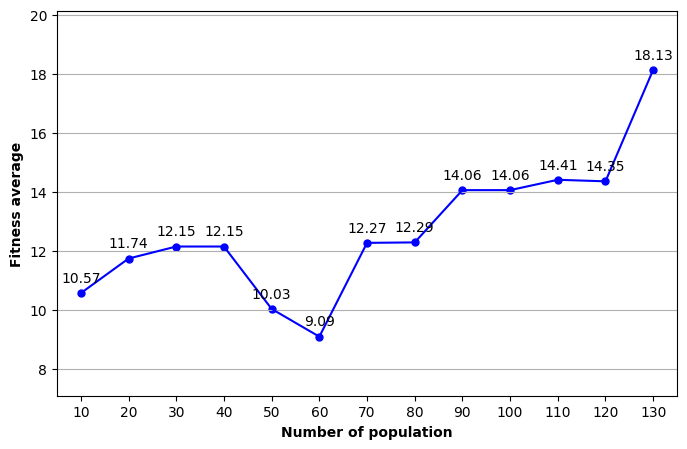

In [20]:
import random
import matplotlib.pyplot as plt

# List of population sizes to experiment with
macam_populasi = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
num_trials = 10  # Number of trials for each population size

results = {}
j = 1  # Counter for tracking parameter sets

for value in macam_populasi:
    trial_fitness_results = []  # List to store fitness results for each trial
    seed_value = 50  # Initial seed value for reproducibility
    x = 1  # Counter for tracking trials

    print(f'Parameter ke- -> {j}')
    
    for _ in range(num_trials):
        mutation_rate = 0.5
        isLoop = True
        generasi = 0
        
        # Set the random seed and create the initial population
        random.seed(seed_value)
        populasi = createPopulation(15, value)
        print(f'{x} -> {populasi}')
        
        n = 0  # Counter for mutation seed adjustment
        
        while isLoop:
            # Selection: Choose the two best individuals as parents
            parent1, parent2 = selection(populasi)
            
            # Crossover point is selected randomly each iteration
            seed_value2 = 20 + n
            n += 1
            random.seed(seed_value2)
            cp = random.randint(1, len(parent1['gen']))
            
            # Perform crossover to generate children
            child1, child2 = crossOver(parent1['gen'], parent2['gen'], cp, cr=0.5)

            # Mutation: Apply insertion mutation to the children
            mutasi1 = {'gen': insertion_mutation(child1, mutation_rate)}
            mutasi2 = {'gen': insertion_mutation(child2, mutation_rate)}
            mutasi1['fitness'] = fitness_func(mutasi1['gen'])
            mutasi2['fitness'] = fitness_func(mutasi2['gen'])

            # Regenerate population with new children
            children = [mutasi1, mutasi2]
            populasi = regeneration(children, populasi)
        
            # Termination: Check if the algorithm should stop
            best, best_fit = termination(populasi, generasi)
            generasi += 1
            if generasi == 20:
                isLoop = False
            
        # Record the best fitness value of the trial
        trial_fitness_results.append(best_fit)
        seed_value += 1
        x += 1
    
    # Calculate and store the average fitness for this population size
    results[value] = sum(trial_fitness_results) / num_trials
    j += 1

# Plotting the results
color = 'blue'
plt.figure(figsize=(8, 5))
x_values = list(results.keys())
y_values = list(results.values())

# Scatter plot of the data points
plt.scatter(x_values, y_values, s=25, c=color, label='Data points')

# Annotate each data point with its corresponding y-value
for i, txt in enumerate(y_values):
    plt.annotate(f'{txt:.2f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 8), ha='center')

# Set plot limits
plt.ylim(min(y_values)-2, max(y_values)+2)
plt.xlim(min(x_values)-5, max(x_values)+5)
plt.xticks(x_values)

# Plot the average fitness line
plt.plot(x_values, y_values, label='Average Fitness', color=color)
plt.xlabel('Number of population', fontweight='bold')
plt.ylabel('Fitness average', fontweight='bold')
plt.grid(axis='y')

# Display the plot
plt.show()


### Generation tuning

Parameter ke -> 1
1 -> {'1': {'gen': [7, 4, 6, 9, 4, 10, 7, 11, 5, 2, 8, 5, 4, 10, 8], 'fitness': 0.6639206574010945}, '2': {'gen': [2, 3, 5, 2, 5, 5, 4, 3, 2, 5, 9, 9, 6, 9, 2], 'fitness': 0.7411502534198269}, '3': {'gen': [2, 10, 9, 5, 10, 9, 7, 1, 4, 5, 4, 7, 10, 2, 4], 'fitness': 0.8645403020264787}, '4': {'gen': [7, 4, 10, 8, 7, 3, 4, 9, 4, 8, 8, 3, 6, 10, 9], 'fitness': 1.0717377576044846}, '5': {'gen': [10, 3, 9, 8, 7, 6, 8, 8, 10, 3, 7, 8, 8, 5, 2], 'fitness': 0.4806411963840286}, '6': {'gen': [6, 11, 8, 3, 1, 6, 1, 9, 10, 6, 7, 9, 8, 4, 3], 'fitness': 0.3857125773433447}, '7': {'gen': [10, 8, 2, 3, 4, 6, 4, 5, 1, 9, 8, 2, 2, 9, 4], 'fitness': 0.45641591427919576}, '8': {'gen': [10, 4, 8, 6, 7, 8, 6, 11, 6, 7, 2, 6, 3, 6, 2], 'fitness': 1.215962067050016}, '9': {'gen': [11, 11, 1, 2, 7, 10, 9, 8, 1, 5, 5, 5, 8, 9, 10], 'fitness': 0.42710692611328793}, '10': {'gen': [8, 7, 2, 5, 3, 7, 4, 2, 9, 2, 1, 3, 3, 2, 3], 'fitness': 0.7335443578714583}, '11': {'gen': [1, 5, 10, 10, 6, 1, 

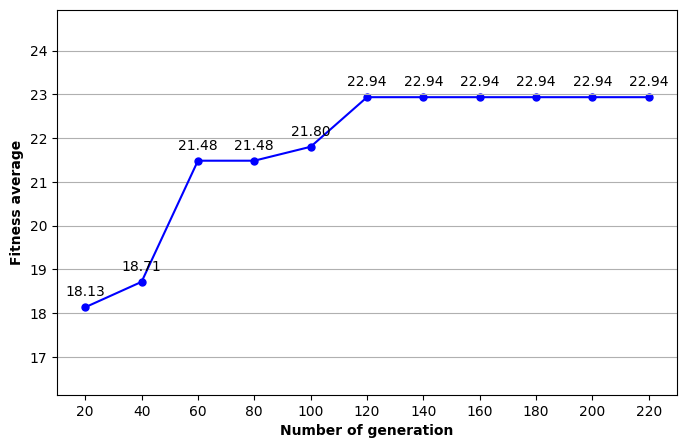

In [21]:
import random
import matplotlib.pyplot as plt

# Configuration parameters
macam_populasi = 130  # Fixed population size
macam_generasi = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]  # Different generation counts to test
num_trials = 10  # Number of trials per generation count

results = {}
j = 1  # Parameter set counter

# Loop over the number of generations to analyze the effect on fitness
for value in macam_generasi:
    trial_fitness_results = []  # To store fitness results for each trial
    seed_value = 50  # Initial seed value for reproducibility
    print(f'Parameter ke -> {j}')
    
    # Perform trials for the current generation count
    x = 1  # Trial counter
    for _ in range(num_trials):
        mutation_rate = 0.5  # Mutation rate
        isLoop = True
        generasi = 0
        
        # Seed the random number generator and create the initial population
        random.seed(seed_value)
        populasi = createPopulation(15, macam_populasi)
        print(f'{x} -> {populasi}')
        x += 1
        n = 0  # Counter for mutation seed adjustment
        
        while isLoop:
            # Selection: Choose the two best individuals as parents
            parent1, parent2 = selection(populasi)
            
            # Randomly determine the crossover point
            seed_value2 = 20 + n
            n += 1
            random.seed(seed_value2)
            cp = random.randint(1, len(parent1['gen']))
            
            # Perform crossover to generate children
            child1, child2 = crossOver(parent1['gen'], parent2['gen'], cp, cr=0.5)

            # Mutation: Apply insertion mutation to the children
            mutasi1 = {'gen': insertion_mutation(child1, mutation_rate)}
            mutasi2 = {'gen': insertion_mutation(child2, mutation_rate)}
            mutasi1['fitness'] = fitness_func(mutasi1['gen'])
            mutasi2['fitness'] = fitness_func(mutasi2['gen'])

            # Regeneration: Update the population with new children
            children = [mutasi1, mutasi2]
            populasi = regeneration(children, populasi)
        
            # Termination: Check if the current generation count has been reached
            best, best_fit = termination(populasi, generasi)
            generasi += 1
            if generasi == value:
                isLoop = False
        
        # Record the best fitness result from this trial
        seed_value += 1
        trial_fitness_results.append(best_fit)
    
    # Calculate the average fitness for the current generation count
    results[value] = sum(trial_fitness_results) / num_trials
    j += 1

# Plotting the results
plt.figure(figsize=(8, 5))
x_values = list(results.keys())
y_values = list(results.values())

# Scatter plot for each data point
plt.scatter(x_values, y_values, s=25, c='blue')

# Annotate each data point with its corresponding y-value
for i, txt in enumerate(y_values):
    plt.annotate(f'{txt:.2f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 8), ha='center')

# Set plot limits
plt.ylim(min(y_values)-2, max(y_values)+2)
plt.xlim(min(x_values)-10, max(x_values)+10)
plt.xticks(x_values)

# Plot the line connecting the average fitness values
plt.plot(x_values, y_values, color='blue')
plt.xlabel('Number of generation', fontweight='bold')
plt.ylabel('Fitness average', fontweight='bold')
plt.grid(axis='y')

# Display the plot
plt.show()

### Combination of CR and MR tuning

Parameter set -> 1
Trial 1 -> Population: {'1': {'gen': [7, 4, 6, 9, 4, 10, 7, 11, 5, 2, 8, 5, 4, 10, 8], 'fitness': 0.6639206574010945}, '2': {'gen': [2, 3, 5, 2, 5, 5, 4, 3, 2, 5, 9, 9, 6, 9, 2], 'fitness': 0.7411502534198269}, '3': {'gen': [2, 10, 9, 5, 10, 9, 7, 1, 4, 5, 4, 7, 10, 2, 4], 'fitness': 0.8645403020264787}, '4': {'gen': [7, 4, 10, 8, 7, 3, 4, 9, 4, 8, 8, 3, 6, 10, 9], 'fitness': 1.0717377576044846}, '5': {'gen': [10, 3, 9, 8, 7, 6, 8, 8, 10, 3, 7, 8, 8, 5, 2], 'fitness': 0.4806411963840286}, '6': {'gen': [6, 11, 8, 3, 1, 6, 1, 9, 10, 6, 7, 9, 8, 4, 3], 'fitness': 0.3857125773433447}, '7': {'gen': [10, 8, 2, 3, 4, 6, 4, 5, 1, 9, 8, 2, 2, 9, 4], 'fitness': 0.45641591427919576}, '8': {'gen': [10, 4, 8, 6, 7, 8, 6, 11, 6, 7, 2, 6, 3, 6, 2], 'fitness': 1.215962067050016}, '9': {'gen': [11, 11, 1, 2, 7, 10, 9, 8, 1, 5, 5, 5, 8, 9, 10], 'fitness': 0.42710692611328793}, '10': {'gen': [8, 7, 2, 5, 3, 7, 4, 2, 9, 2, 1, 3, 3, 2, 3], 'fitness': 0.7335443578714583}, '11': {'gen': [1

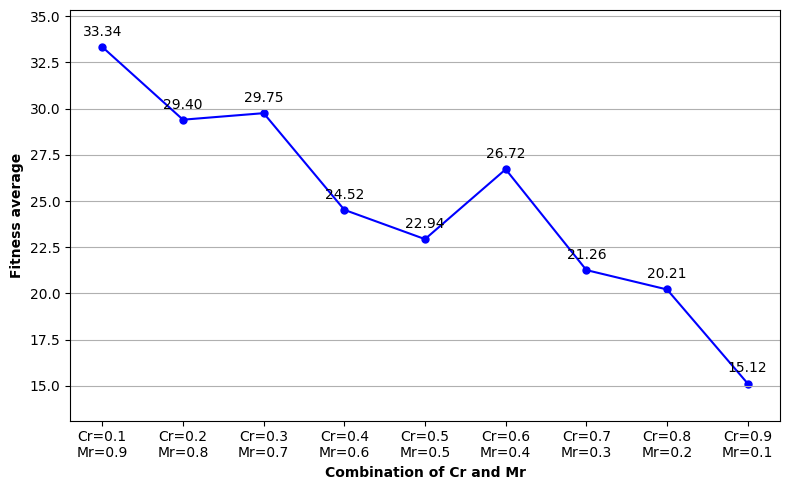

In [22]:
import random
import matplotlib.pyplot as plt

# Configuration for the experiment
macam_populasi = 130  # Population size
macam_generasi = 120  # Number of generations
macam_kombinasi = [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], 
                   [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]  # List of [Cr, Mr] combinations
num_trials = 10  # Number of trials per combination

# Initialize results storage
results = {}
j = 1

# Iterate over each combination of Cr and Mr
for idx, value in enumerate(macam_kombinasi):
    trial_fitness_results = []
    seed_value = 50  # Seed value for random number generator
    print(f'Parameter set -> {j}')

    # Perform trials for the current combination
    for trial in range(num_trials):
        isLoop = True
        generasi = 0
        random.seed(seed_value)
        populasi = createPopulation(15, macam_populasi)
        print(f'Trial {trial + 1} -> Population: {populasi}')
        n = 0

        # Evolutionary loop
        while isLoop:
            # Select best individuals from the population
            parent1, parent2 = selection(populasi)

            # Random crossover point
            seed_value2 = 20 + n
            n += 1
            random.seed(seed_value2)
            cp = random.randint(1, len(parent1['gen']))

            # Perform crossover with the given Cr
            child1, child2 = crossOver(parent1['gen'], parent2['gen'], cp, cr=value[0])

            # Perform mutation with the given Mr
            mutasi1 = {'gen': insertion_mutation(child1, value[1])}
            mutasi2 = {'gen': insertion_mutation(child2, value[1])}
            mutasi1['fitness'] = fitness_func(mutasi1['gen'])
            mutasi2['fitness'] = fitness_func(mutasi2['gen'])

            # Generate new population with regenerated children
            children = [mutasi1, mutasi2]
            populasi = regeneration(children, populasi)

            # Terminate if maximum generations are reached
            best, best_fit = termination(populasi, generasi)
            generasi += 1
            if generasi == macam_generasi:
                isLoop = False

        # Store the best fitness for this trial
        trial_fitness_results.append(best_fit)
        seed_value += 1

    # Compute average fitness for the current combination
    results[idx] = sum(trial_fitness_results) / num_trials
    j += 1

# Plotting the results
plt.figure(figsize=(8, 5))

# Create labels for each combination of Cr and Mr
labels = [f'Cr={cr}\nMr={mr}' for cr, mr in macam_kombinasi]

# X-values corresponding to the number of combinations
x_values = range(len(macam_kombinasi))

# Y-values as average fitness results
y_values = list(results.values())

# Plot data points and labels
for i in range(len(x_values)):
    plt.scatter(x_values[i], y_values[i], s=25, c='blue')
    plt.annotate(f'{y_values[i]:.2f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 8), ha='center')

# Set X-ticks to display the Cr and Mr combinations
plt.xticks(x_values, labels)

# Plot the average fitness line
plt.plot(x_values, y_values, color='blue')

# Set labels and grid
plt.ylim(min(y_values) - 2, max(y_values) + 2)
plt.xlabel('Combination of Cr and Mr', fontweight='bold')
plt.ylabel('Fitness average', fontweight='bold')
plt.grid(axis='y')

# Ensure labels are not cut off
plt.tight_layout()
plt.show()


## Genetics Algorithm with the best hyperparameter

In [24]:
import random
import time
import matplotlib.pyplot as plt

# Configuration
macam_populasi = 130  # Population size
macam_generasi = 120  # Number of generations
macam_kombinasi = [0.1, 0.9]  # [Crossover rate, Mutation rate]
num_trials = 10  # Number of trials

# Initialize the seed and trial counter
seed_value = 50
x = 1

# List to store the best fitness results and the corresponding generation
best_fit_results = []

# Main loop to run multiple trials
for trial in range(num_trials):
    isLoop = True
    generasi = 0
    random.seed(seed_value)

    # Create initial population
    populasi = createPopulation(15, macam_populasi)
    print(f'Trial {x} -> Population: {populasi}')
    x += 1
    n = 0

    # Evolutionary loop
    while isLoop:
        # Select the best individuals (parents)
        parent1, parent2 = selection(populasi)

        # Randomly determine the crossover point (cp)
        seed_value2 = 20 + n
        n += 1
        random.seed(seed_value2)
        cp = random.randint(1, len(parent1['gen']))

        # Perform crossover using the specified crossover rate (Cr)
        child1, child2 = crossOver(parent1['gen'], parent2['gen'], cp, cr=macam_kombinasi[0])

        # Perform mutation on the offspring using the specified mutation rate (Mr)
        mutasi1 = {'gen': insertion_mutation(child1, macam_kombinasi[1])}
        mutasi2 = {'gen': insertion_mutation(child2, macam_kombinasi[1])}
        mutasi1['fitness'] = fitness_func(mutasi1['gen'])
        mutasi2['fitness'] = fitness_func(mutasi2['gen'])

        # Regenerate the population with the new offspring
        children = [mutasi1, mutasi2]
        populasi = regeneration(children, populasi)

        # Check for the best fitness in the current generation
        best, best_fit = termination(populasi, generasi)
        generasi += 1
        if generasi == macam_generasi:
            isLoop = False

        # Store the best fitness and the generation it was found
        best_fit_results.append((best_fit, generasi))

    # Increment seed for the next trial
    seed_value += 1

# Print the results of best fitness and the generation where it was found
for i, (fit, gen) in enumerate(best_fit_results):
    print(f"Trial {i + 1}: Best fitness {fit} found in generation {gen}")

Trial 1 -> Population: {'1': {'gen': [7, 4, 6, 9, 4, 10, 7, 11, 5, 2, 8, 5, 4, 10, 8], 'fitness': 0.6639206574010945}, '2': {'gen': [2, 3, 5, 2, 5, 5, 4, 3, 2, 5, 9, 9, 6, 9, 2], 'fitness': 0.7411502534198269}, '3': {'gen': [2, 10, 9, 5, 10, 9, 7, 1, 4, 5, 4, 7, 10, 2, 4], 'fitness': 0.8645403020264787}, '4': {'gen': [7, 4, 10, 8, 7, 3, 4, 9, 4, 8, 8, 3, 6, 10, 9], 'fitness': 1.0717377576044846}, '5': {'gen': [10, 3, 9, 8, 7, 6, 8, 8, 10, 3, 7, 8, 8, 5, 2], 'fitness': 0.4806411963840286}, '6': {'gen': [6, 11, 8, 3, 1, 6, 1, 9, 10, 6, 7, 9, 8, 4, 3], 'fitness': 0.3857125773433447}, '7': {'gen': [10, 8, 2, 3, 4, 6, 4, 5, 1, 9, 8, 2, 2, 9, 4], 'fitness': 0.45641591427919576}, '8': {'gen': [10, 4, 8, 6, 7, 8, 6, 11, 6, 7, 2, 6, 3, 6, 2], 'fitness': 1.215962067050016}, '9': {'gen': [11, 11, 1, 2, 7, 10, 9, 8, 1, 5, 5, 5, 8, 9, 10], 'fitness': 0.42710692611328793}, '10': {'gen': [8, 7, 2, 5, 3, 7, 4, 2, 9, 2, 1, 3, 3, 2, 3], 'fitness': 0.7335443578714583}, '11': {'gen': [1, 5, 10, 10, 6, 1, 

## Visualize the menues

In [25]:
import time

# Parameters
macam_populasi = 130  # Size of the population
macam_generasi = 120  # Number of generations to evolve
macam_kombinasi = [0.1, 0.9]  # Combination of crossover rate (Cr) and mutation rate (Mr)
num_trials = 5  # Number of trials to run

# List to store results of the best fitness and its corresponding individual
best_fit_results = []

# Running multiple trials
for trial in range(num_trials):
    isLoop = True
    generasi = 0  # Initialize generation counter

    # Start timing the execution
    start_time = time.time()

    # Initialize the population with random individuals
    populasi = createPopulation(15, macam_populasi)

    while isLoop:
        # Selection of the best individuals as parents
        parent1, parent2 = selection(populasi)

        # Determine crossover point (cp) randomly within the gene length
        cp = random.randint(1, len(parent1['gen']))

        # Perform crossover with specified crossover rate (Cr)
        child1, child2 = crossOver(parent1['gen'], parent2['gen'], cp, cr=macam_kombinasi[0])

        # Perform mutation on the offspring with specified mutation rate (Mr)
        mutasi1 = {'gen': insertion_mutation(child1, macam_kombinasi[1])}
        mutasi2 = {'gen': insertion_mutation(child2, macam_kombinasi[1])}

        # Calculate fitness for the mutated offspring
        mutasi1['fitness'] = fitness_func(mutasi1['gen'])
        mutasi2['fitness'] = fitness_func(mutasi2['gen'])

        # Regenerate the population with new offspring
        children = [mutasi1, mutasi2]
        populasi = regeneration(children, populasi)

        # Check for termination condition (end of generations)
        best, best_fit = termination(populasi, generasi)
        generasi += 1
        if generasi == macam_generasi:
            isLoop = False

    # Record the time taken for the trial
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Waktu eksekusi percobaan {trial + 1}: {execution_time:.2f} detik")

    # Store the best fitness and the corresponding individual
    best_fit_results.append((best_fit, best))

# Output results of all trials
for i, (fit, best) in enumerate(best_fit_results):
    print(f"Percobaan {i+1}: Best fit {fit} dengan susunan {best}")
    menues(best)  # Process or display the best individual as needed

Waktu eksekusi percobaan 1: 0.38 detik
Waktu eksekusi percobaan 2: 0.36 detik
Waktu eksekusi percobaan 3: 0.35 detik
Waktu eksekusi percobaan 4: 0.30 detik
Waktu eksekusi percobaan 5: 0.29 detik
Percobaan 1: Best fit 21.21572518655893 dengan susunan [2, 8, 4, 7, 1, 8, 7, 5, 8, 11, 8, 2, 4, 1, 8]
Makan Pagi
Makanan pokok	 = Nasi Beras Merah
Sumber Nabati	 = Kacang Tanah Rebus
Sumber Hewani	 = Pempek Tengiri
Sayuran		 = Sayur Sop
Pelengkap	 = Yoghurt
Makan Siang
Makanan pokok	 = Kentang rebus
Sumber Nabati	 = Oncom
Sumber Hewani	 = Tumis Bandeng
Sayuran		 = Tumis Bayam Bersantan
Pelengkap	 = Kesemek
Makan Malam
Makanan pokok	 = Kentang rebus
Sumber Nabati	 = Kacang Kedelai Rebus
Sumber Hewani	 = Pempek Tengiri
Sayuran		 = Brongkos
Pelengkap	 = Jeruk Bali
Percobaan 2: Best fit 48.00993541608586 dengan susunan [8, 7, 9, 10, 2, 2, 7, 11, 7, 7, 5, 9, 8, 4, 4]
Makan Pagi
Makanan pokok	 = Kentang rebus
Sumber Nabati	 = Oncom
Sumber Hewani	 = Ikan Mas Pepes
Sayuran		 = Ketimun
Pelengkap	 = Alpu

## Menues for the Momby

In [27]:
days = 1 #1/3/7

import time

# Parameters
macam_populasi = 130  # Size of the population
macam_generasi = 120  # Number of generations to evolve
macam_kombinasi = [0.1, 0.9]  # Combination of crossover rate (Cr) and mutation rate (Mr)
num_trials = days  # Number of trials to run

# List to store results of the best fitness and its corresponding individual
best_fit_results = []

# Running multiple trials
for trial in range(num_trials):
    isLoop = True
    generasi = 0  # Initialize generation counter

    # Start timing the execution
    start_time = time.time()

    # Initialize the population with random individuals
    populasi = createPopulation(15, macam_populasi)

    while isLoop:
        # Selection of the best individuals as parents
        parent1, parent2 = selection(populasi)

        # Determine crossover point (cp) randomly within the gene length
        cp = random.randint(1, len(parent1['gen']))

        # Perform crossover with specified crossover rate (Cr)
        child1, child2 = crossOver(parent1['gen'], parent2['gen'], cp, cr=macam_kombinasi[0])

        # Perform mutation on the offspring with specified mutation rate (Mr)
        mutasi1 = {'gen': insertion_mutation(child1, macam_kombinasi[1])}
        mutasi2 = {'gen': insertion_mutation(child2, macam_kombinasi[1])}

        # Calculate fitness for the mutated offspring
        mutasi1['fitness'] = fitness_func(mutasi1['gen'])
        mutasi2['fitness'] = fitness_func(mutasi2['gen'])

        # Regenerate the population with new offspring
        children = [mutasi1, mutasi2]
        populasi = regeneration(children, populasi)

        # Check for termination condition (end of generations)
        best, best_fit = termination(populasi, generasi)
        generasi += 1
        if generasi == macam_generasi:
            isLoop = False

    # Record the time taken for the trial
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Waktu eksekusi percobaan {trial + 1}: {execution_time:.2f} detik")

    # Store the best fitness and the corresponding individual
    best_fit_results.append((best_fit, best))

# Output results of all trials
for i, (fit, best) in enumerate(best_fit_results):
    print(f"Percobaan {i+1}: Best fit {fit} dengan susunan {best}")
    menues(best)  # Process or display the best individual as needed

Waktu eksekusi percobaan 1: 0.32 detik
Percobaan 1: Best fit 102.73189250069838 dengan susunan [8, 8, 9, 7, 6, 2, 5, 5, 7, 9, 1, 9, 5, 4, 6]
Makan Pagi
Makanan pokok	 = Kentang rebus
Sumber Nabati	 = Kacang Tanah Rebus
Sumber Hewani	 = Ikan Mas Pepes
Sayuran		 = Sayur Sop
Pelengkap	 = Duku
Makan Siang
Makanan pokok	 = Nasi Beras Merah
Sumber Nabati	 = Tauco
Sumber Hewani	 = Tumis Bandeng
Sayuran		 = Sayur Sop
Pelengkap	 = Jeruk Manis
Makan Malam
Makanan pokok	 = Nasi Putih
Sumber Nabati	 = Kacang Hijau Rebus
Sumber Hewani	 = Tumis Bandeng
Sayuran		 = Sayur Bunga Pepaya
Pelengkap	 = Duku
